---
## **Remove bias and create a High Dimensional Dataset**
---

<font size="2">Eudald Sangenis  

The objective of this file is to remove the bias of the signals of the a High Dimensional Train/Test Dataset.

Parameters High Dimensional Dataset:  
- type_dataset: train, test 
- data_dataset:  2022_03_17 (Subject I), 2022_08_01 (Subject II), 2022_07_27 (Subject III)
- window_number: 50, 100, 200, 400</font>

---
## **<font size="5">1. Libraries: </font>**
---

In [6]:
import os
import sys
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()
# Get the parent directory (where the module is located)
parent_directory = os.path.dirname(current_directory)
# Append the parent directory to sys.path
sys.path.append(parent_directory)

---
## **<font size="5">2. Parameters to modify</font>**
---

In [7]:
type_dataset = 'test'       # train, test
data_dataset = '2022_08_01' # 2022_03_17 2022_04_25 2022_07_27 2022_08_01
window_number = 400         # 50 100 200 400

In [8]:
# Folder to read the labeled and HD datasets:
dataset_path_labeled = parent_directory+'\\2_labeled_datasets\\'+data_dataset+'\\'
dataset_path_unlabeled = current_directory+'\\HD_datasets\\'+data_dataset+'\\'

In [9]:
# Folder to save HD datsets:
save_dataset_path = current_directory+'\\HD_datasets\\'+data_dataset+'\\'

---
## **<font size="5">3. Label HD datasets:</font>**
---

In [10]:
print('Reading dataset '+data_dataset+' ...')
# Load the 2 sig labeled dataset - take label and concat to HD dataset
df_l = pd.read_csv(dataset_path_labeled + '2sig_'+type_dataset+'_df.csv')
# Load the HD dataset
df   = pd.read_csv(dataset_path_unlabeled + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'.csv')
print('Reading done!')

if 'Unnamed: 0' in df:   df   = df.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0' in df_l: df_l = df_l.drop(['Unnamed: 0'], axis=1)

print('Shapes df & df_l:')
print(df.shape, df_l.shape)

Reading dataset 2022_08_01 ...
Reading done!
Shapes df & df_l:
(308554, 2406) (308954, 4)


In [11]:
df.head(2)

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,0.024983,-0.006249,-0.987329,-0.011539,0.002000,-0.011229,0.026351,-0.004096,-0.987442,-0.012501,...,-0.979135,-0.017425,-0.051559,-0.022543,0.024983,-0.003676,-0.980239,-0.018434,-0.051307,-0.019825
1,0.026351,-0.004096,-0.987442,-0.012501,0.003847,-0.010429,0.024423,-0.001987,-0.991508,-0.010466,...,-0.980239,-0.018434,-0.051307,-0.019825,0.031693,0.000449,-0.984306,-0.019515,-0.054257,-0.019799


In [12]:
df_l.head(2)

,timestamp,acc,gyro,label
0,0.030625,0.986566,0.015525,ZUPT
1,0.031875,0.986481,0.015458,ZUPT


In [13]:
df = pd.concat([df, df_l.loc[window_number:,['label']].reset_index().drop(['index'],axis=1)], axis=1)
# del df_l
df

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0,label
0,0.024983,-0.006249,-0.987329,-0.011539,0.002000,-0.011229,0.026351,-0.004096,-0.987442,-0.012501,...,-0.017425,-0.051559,-0.022543,0.024983,-0.003676,-0.980239,-0.018434,-0.051307,-0.019825,ZUPT
1,0.026351,-0.004096,-0.987442,-0.012501,0.003847,-0.010429,0.024423,-0.001987,-0.991508,-0.010466,...,-0.018434,-0.051307,-0.019825,0.031693,0.000449,-0.984306,-0.019515,-0.054257,-0.019799,ZUPT
2,0.024423,-0.001987,-0.991508,-0.010466,0.004974,-0.011125,0.022808,-0.003290,-0.990991,-0.009614,...,-0.019515,-0.054257,-0.019799,0.031701,-0.000392,-0.978623,-0.020507,-0.056558,-0.021849,ZUPT
3,0.022808,-0.003290,-0.990991,-0.009614,0.003339,-0.011659,0.021317,-0.000933,-0.995246,-0.008998,...,-0.020507,-0.056558,-0.021849,0.027313,-0.000616,-0.981299,-0.018714,-0.053525,-0.022057,ZUPT
4,0.021317,-0.000933,-0.995246,-0.008998,0.004561,-0.011712,0.019285,0.000944,-0.988779,-0.009491,...,-0.018714,-0.053525,-0.022057,0.027663,-0.004549,-0.989081,-0.022028,-0.052175,-0.021570,ZUPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308549,0.019386,0.005974,-0.978879,-0.011523,-0.014550,-0.018996,0.016025,0.004658,-0.977200,-0.013718,...,-0.021918,0.005140,-0.016632,0.007127,0.022026,-0.983154,-0.020418,0.006595,-0.015795,ZUPT
308550,0.016025,0.004658,-0.977200,-0.013718,-0.015254,-0.018992,0.018747,0.003926,-0.980168,-0.015657,...,-0.020418,0.006595,-0.015795,0.007182,0.021964,-0.983094,-0.019863,0.007830,-0.016007,ZUPT
308551,0.018747,0.003926,-0.980168,-0.015657,-0.014844,-0.019252,0.021279,0.002605,-0.980879,-0.015706,...,-0.019863,0.007830,-0.016007,0.010731,0.024156,-0.983907,-0.017660,0.008341,-0.014942,ZUPT
308552,0.021279,0.002605,-0.980879,-0.015706,-0.015002,-0.019305,0.017952,0.002920,-0.977889,-0.014443,...,-0.017660,0.008341,-0.014942,0.012932,0.024731,-0.983640,-0.016607,0.007338,-0.014252,ZUPT


<font size="2">Save HD dataset:</font>

In [14]:
df.to_csv(save_dataset_path + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'.csv')

---
## **<font size="5">4. Remove Bias:</font>**
---

<font size="2">Compute the bias of the first 800 values (1s) of the labeled datset:</font>

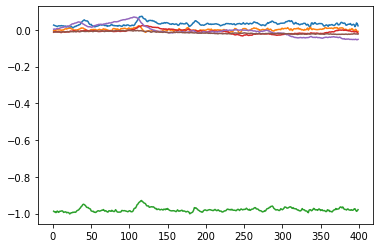

In [15]:
del df_l
plt.plot(df.index[1:400],  df[['acc1_t'+str(window_number),'acc2_t'+str(window_number),'acc3_t'+str(window_number),'gyro1_t'+str(window_number),'gyro2_t'+str(window_number),'gyro3_t'+str(window_number)]].iloc[1:400])

In [16]:
bias_acc_1 = np.mean(df['acc1_t'+str(window_number)].iloc[1:400])
bias_acc_2 = np.mean(df['acc2_t'+str(window_number)].iloc[1:400])
bias_acc_3 = np.mean(df['acc3_t'+str(window_number)].iloc[1:400])
bias_gyr_1 = np.mean(df['gyro1_t'+str(window_number)].iloc[1:400])
bias_gyr_2 = np.mean(df['gyro2_t'+str(window_number)].iloc[1:400])
bias_gyr_3 = np.mean(df['gyro3_t'+str(window_number)].iloc[1:400])
[bias_acc_1, bias_acc_2, bias_acc_3, bias_gyr_1, bias_gyr_2, bias_gyr_3]

[0.032479609871681143,
 0.001661977797913579,
 -0.979514710434217,
 -0.009065844943366786,
 -0.0030667892097806237,
 -0.015263496057980282]

<AxesSubplot:>

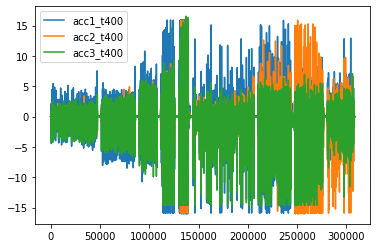

In [17]:
for i in range(0,window_number+1):
    df[f'acc1_t{i}']  = df[f'acc1_t{i}']  - bias_acc_1
    df[f'gyro1_t{i}'] = df[f'gyro1_t{i}'] - bias_gyr_1
    df[f'acc2_t{i}']  = df[f'acc2_t{i}']  - bias_acc_2
    df[f'gyro2_t{i}'] = df[f'gyro2_t{i}'] - bias_gyr_2
    df[f'acc3_t{i}']  = df[f'acc3_t{i}']  - bias_acc_3
    df[f'gyro3_t{i}'] = df[f'gyro3_t{i}'] - bias_gyr_3

df.plot(y = ['acc1_t'+str(window_number), 'acc2_t'+str(window_number), 'acc3_t'+str(window_number)], use_index = True)

<AxesSubplot:>

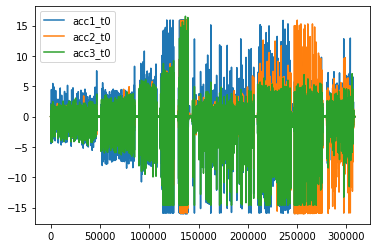

In [18]:
df.plot(y = ['acc1_t0', 'acc2_t0', 'acc3_t0'], use_index = True)

In [19]:
df.to_csv(save_dataset_path + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'_no_Bias.csv')

In [20]:
df

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0,label
0,-0.007497,-0.007911,-0.007815,-0.002473,0.005067,0.004034,-0.006129,-0.005758,-0.007927,-0.003435,...,-0.008360,-0.048492,-0.007279,-0.007497,-0.005338,-0.000724,-0.009369,-0.048241,-0.004562,ZUPT
1,-0.006129,-0.005758,-0.007927,-0.003435,0.006913,0.004834,-0.008057,-0.003649,-0.011993,-0.001400,...,-0.009369,-0.048241,-0.004562,-0.000787,-0.001213,-0.004791,-0.010449,-0.051190,-0.004535,ZUPT
2,-0.008057,-0.003649,-0.011993,-0.001400,0.008041,0.004138,-0.009672,-0.004952,-0.011476,-0.000548,...,-0.010449,-0.051190,-0.004535,-0.000779,-0.002054,0.000892,-0.011442,-0.053491,-0.006585,ZUPT
3,-0.009672,-0.004952,-0.011476,-0.000548,0.006406,0.003604,-0.011163,-0.002595,-0.015731,0.000068,...,-0.011442,-0.053491,-0.006585,-0.005166,-0.002278,-0.001785,-0.009648,-0.050458,-0.006794,ZUPT
4,-0.011163,-0.002595,-0.015731,0.000068,0.007628,0.003552,-0.013195,-0.000718,-0.009264,-0.000425,...,-0.009648,-0.050458,-0.006794,-0.004816,-0.006211,-0.009566,-0.012962,-0.049108,-0.006307,ZUPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308549,-0.013094,0.004312,0.000635,-0.002457,-0.011483,-0.003733,-0.016455,0.002996,0.002315,-0.004652,...,-0.012853,0.008206,-0.001368,-0.025352,0.020364,-0.003640,-0.011352,0.009662,-0.000531,ZUPT
308550,-0.016455,0.002996,0.002315,-0.004652,-0.012188,-0.003728,-0.013732,0.002264,-0.000653,-0.006592,...,-0.011352,0.009662,-0.000531,-0.025298,0.020302,-0.003579,-0.010797,0.010897,-0.000743,ZUPT
308551,-0.013732,0.002264,-0.000653,-0.006592,-0.011777,-0.003989,-0.011201,0.000943,-0.001364,-0.006640,...,-0.010797,0.010897,-0.000743,-0.021749,0.022494,-0.004392,-0.008595,0.011407,0.000321,ZUPT
308552,-0.011201,0.000943,-0.001364,-0.006640,-0.011935,-0.004041,-0.014528,0.001258,0.001626,-0.005377,...,-0.008595,0.011407,0.000321,-0.019547,0.023069,-0.004125,-0.007541,0.010405,0.001012,ZUPT
